# LINEAR ALGEBRA ANALYSIS OF OSCILLATIONS

In [ ]:
!pip install -q tellurium
import tellurium as te
import sympy
from sympy import init_printing
import numpy as np
import pandas as pd

init_printing()

     |████████████████████████████████| 121 kB 5.7 MB/s 
     |████████████████████████████████| 3.3 MB 36.3 MB/s 
     |████████████████████████████████| 36.7 MB 45.0 MB/s 
     |████████████████████████████████| 38.1 MB 42.0 MB/s 
     |████████████████████████████████| 6.8 MB 16.9 MB/s 
     |████████████████████████████████| 121 kB 35.8 MB/s 
     |████████████████████████████████| 5.6 MB 31.8 MB/s 
     |████████████████████████████████| 2.6 MB 37.6 MB/s 
     |████████████████████████████████| 54.8 MB 1.3 MB/s 
     |████████████████████████████████| 2.1 MB 33.4 MB/s 
     |████████████████████████████████| 3.2 MB 34.7 MB/s 
     |████████████████████████████████| 4.3 MB 39.6 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


# Notation

**Scalars**

* $N$ is the number of chemical species (state variables)
* $n$ indexes chemical species
* $M$ is the number of reactions
* $m$ indexes reactions

**Vectors and Matrices**

* ${\bf x}$ ($N \times 1$) is the state vector
* ${\bf k}$ ($M \times 1$) is a vector of parameters
* ${\bf u}$ is the input vector
* ${\bf B}$ is the constant input matrix
* ${\bf A}$ is the constant state transition matrix
* ${\bf N}$ ($N \times M$) is the constant stoichiometry matrix
* ${\bf V}$ ($M \times N$) is the flux vector
* $\dot{ {\bf x}} = {\bf A} {\bf x} + {\bf B}{\bf u}$ is the time derivative of state


# Definitions

* A **reaction network** is a system of ODEs that can be realized by a collection of reactions where the concentration of chemical species are the state variables.

* A **linear reaction network (LRN)** is a reaction network with kinetics that form a system of linear ODEs.

* A **uni-reactant, mass action reaction network (UMRN)** is a reaction network in which all reactions have a single reactant and the kinetics are mass action.

* Two networks are **compatible** if they have the same chemical species. We can always make two networks compatible by including missing species, although there will be no reactions with those species.

# Preliminary Results

The goal of this analysis is to characterize how changes in reaction rates and/or structure affect eigenvalues, especially: (a) stability and (b) oscillations.

**Claim**: ${\bf A}$ specifies a UMRN system iff
there are ${\bf A} = {\bf N} {\bf V}$ such that:
* Every column in ${\bf N}$ has exactly one negative value.
* Every row in ${\bf V}$ has exactly one non-zero value.

**Observations for a UMRN**
* If ${\bf A}$ specifies a UMRA, then $r {\bf A}$ is a UMRA for $r \geq 0$.
* If ${\bf A}$, ${\bf A}^{\prime}$ are for compatible UMRN systems, then ${\bf A} + {\bf A}^{\prime}$ specifies a UMRA system.

**Possible Claim**: If ${\bf A}$ specifies a LRA, then exists UMRA matrices ${\bf N}$, ${\bf V}$ such that ${\bf A} = {\bf N} {\bf V}$.

**Claim**: A UMRA is an LRA.

**Proof**: 

**Claim**: Consider an UMRA with state variable Jacobian ${\bf A}$
and eigenvalues $\lambda_1, \cdots, \lambda_N$.
Consider a second UMRA that consists entirely of autocatyltic reactions
so that $\dot{x} = a x$, $a > 0$ for all state variables $x$.
Then, the combination of these two networks has the eigenvalues
$\lambda_1 + a, \cdots, \lambda_N +a$.

This claim allows us to change the real part of the eigenvalues.

# Analysis of Characteristic Equations

For the Jacobian ${\bf A}$, the characteristic equation is
$p(\lambda) = |{\bf A} - \lambda {\bf I}| = 0$.

$p(\lambda)$ can be expressed in the following ways.
1. $p(\lambda) = \sum_{n=0}^N \alpha_n \lambda^n$
1. $p(\lambda) = \Pi_{n=1}^N (\lambda - \lambda_n)$
1. $p(\lambda) = \sum_{\sigma} sign(\sigma) \Pi_{n=1}^N (a_{n, \sigma(n)} - \phi_{n, \sigma(n)} \lambda)$, where $\phi_{n_1, n_2} = 1 \iff n_1 = n_2$.

In the foregoing, $\sigma$ is a permutation of $(1, \cdots, N)$,
and $sign(\sigma)$ is $(-1)^n$, where $n$ is the number of pairwise exchanges to construct the permutation from the identity permutation.

Suppose that initially ${\bf A}$ is diagonal with $a_{nn} < 0$.
That is, the network consists entirely of degradation reactions,
and let $p$ be the characteristic polynomial for this network.
Now consider ${\bf A}^{\prime}$ that adds to this network
the reactions
$x_1 \rightarrow m_2 x_2$ at rate $k_1$, where $m_2$ is the stoichiometry of the species $x_2$,
and $x_2 \rightarrow m_1 x_1$ at rate $k_2$.
Let $p^{\prime}$ be the characteristic polynomial for this network.
${\bf A}^D = {\bf A}^{\prime} - {\bf A}$ has 3 non-zero entries:
* $a^D_{1,1} = -k_1$
* $a^D_{1,2} = m_2 k_1$
* $a^D_{2, 1} = m_1 k_2$
* $a^D_{2,2} = -k_2$

Further, define $p_{1,2} (\lambda) = \Pi_{n\neq1,2} (\lambda - \lambda_n)$.
$p(\lambda) = p_{1,2}(\lambda) (\lambda - \lambda_1)(\lambda - \lambda_2) $.
$p^{\prime} (\lambda) = p_{1,2}(\lambda)
\left( (\lambda - \lambda_1)(\lambda - \lambda_2) - a^D_{1,2} a^D_{2,1} \right)$.

[Is this correct? I should get an imaginary result?]

A key consideration is determining if a cubic equation has a pure imaginary root.

Consider 
\begin{eqnarray}
p(\lambda) & = & (\lambda - r)(\lambda - ib)(\lambda + ib) \\
& = & (\lambda -r)(\lambda^2 + b^2) \\
& = & \lambda^3 - r \lambda^2 + b^2 \lambda - r b^2 \\
& = & A \lambda^3 - B \lambda^2 + C \lambda - D \\
\end{eqnarray}
where $A = 1$.

Observed that the roots are easily determined from the coefficients of the terms.
A simple check is that $D = BC$, and $B, C, D$ are functions of ${\bf k}$.

Consider the objective function $min_{\bf k} |D - BC|$. The one concern here is that all eigenvalues are non-positive.


Construct a explicit expression for the cubic equation for a 3 state system.

# Two Species System

Consider an URMA network consisting of $S_1$, $S_2$.

Let ${\bf A} =
\begin{pmatrix}
a_{11} & a_{12} \\
a_{21} & a_{22} \\
\end{pmatrix}
$
Denote the determinant by $D = a_{11} a_{22} - a_{12} a_{21}$
and the trace by $T = a_{11} + a_{22}$. The eigenvalues are
$\lambda = \frac{1}{2} \left( - T \pm \sqrt{T^2 - 4 D} \right)$.
So, to get pure imaginary eigenvalues, $T = 0$
and $D > 0$.

$T = 0$ implies that either the diagonal is zero or
one diagonal term is positive and the other is negative.
In either case, it must be that one of the off-diagonal terms is negative.

We can obtain a positive value for a diagonal term by having self-catlytic reactions, such as $S_1 \rightarrow S_1 + S_1$
with mass action kinetics $k S_1$.
We can obtain a negative value for an off-diagonal term by having
degrading reactions catlyzed by the other element, such as
$S_2 \rightarrow ∅$ with kinetics $k S_1 S_2$. Note that these are non-linear kinetics that might be approximated by linear kinetics. 

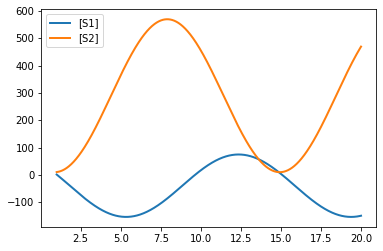

In [ ]:
model = """
S1 -> 2 S1; k1*S1
S1 -> S2; k2*S1
S2 -> ; k3*S1
S2 -> S1; k4*S2
S1 -> ; 50
-> S2; 10

k2 = 1
k4 = 0.2
delta = 1
k1 = k2 + k4
k3 = k1 + delta

S1 = 1
S2 = 10

"""
rr = te.loada(model)
rr.simulate(1,20, 1000)
rr.plot()

## System Equations

This system equations are:
$
\begin{eqnarray}
\dot{S}_1 & = & k_1 S_1 + k_4 S_2 - k_2 S_1 \\
\dot{S}_2 & = & - k_3 S_1 + k_2 S_1 - k_4 S_2 \\
\end{eqnarray}
$

Let ${\bf x} = 
\begin{pmatrix}
S_1 \\
S_2 \\
\end{pmatrix}
$, and
$
{\bf A} = 
\begin{pmatrix}
k_1 - k_2 & k_4 \\
k_2 - k_3 & -k_4 \\
\end{pmatrix}
$.

The full model is:
$\dot{\bf x} = {\bf A} {\bf x} + {\bf u}$.

Note that
\begin{eqnarray}
T & = & tr(A) = k_1 -k_2 - k_4 \\
D & = & det(A) = (k_1 - k_2)(-k_4) - k_4 (k_2 - k_3) \\
& = & k_4 (k_3 - k_1) \\
& = & k_4 \delta,
\end{eqnarray}
where $\delta = k_3 - k_1$.

Note that if $tr({\bf A}) = 0$, then $k_1 = k_2 + k_4$.
And so, $\delta = k_3 - k_1 = k_3 - k_2 - k_4$.
That is,
$k_3 = \delta + k_2 + k_4$.

In [ ]:
S1, S2, k1, k2, k3, k4, d, T, D = sympy.symbols("S1, S2, k1, k2, k3, k4, d, T, D")
A = sympy.Matrix([ [k4 , k4], [-d-k4, -k4]])
A

⎡  k₄     k₄ ⎤
⎢            ⎥
⎣-d - k₄  -k₄⎦

In [ ]:
A.eigenvects()

⎡⎛               ⎡⎡     -k₄      ⎤⎤⎞  ⎛              ⎡⎡     -k₄      ⎤⎤⎞⎤
⎢⎜               ⎢⎢──────────────⎥⎥⎟  ⎜              ⎢⎢──────────────⎥⎥⎟⎥
⎢⎜   _______     ⎢⎢       _______⎥⎥⎟  ⎜  _______     ⎢⎢       _______⎥⎥⎟⎥
⎢⎜-╲╱ -d⋅k₄ , 1, ⎢⎢k₄ + ╲╱ -d⋅k₄ ⎥⎥⎟, ⎜╲╱ -d⋅k₄ , 1, ⎢⎢k₄ - ╲╱ -d⋅k₄ ⎥⎥⎟⎥
⎢⎜               ⎢⎢              ⎥⎥⎟  ⎜              ⎢⎢              ⎥⎥⎟⎥
⎣⎝               ⎣⎣      1       ⎦⎦⎠  ⎝              ⎣⎣      1       ⎦⎦⎠⎦

To do
1. IVP for homogeneous
1. Forced inputs

## Criteria for Imaginary Poles

Note that the eigenvalues a $2 \times 2$ matrix are

$\lambda = - \frac{T \pm \sqrt{T^2 - 4 D}}{2}$.

The pole $\lambda$ is pure imaginary (i.e., $\sqrt{D}i$) if:
1. $T = 0$. That is, $k_1 = k_2 + k_4$.
1. $D > 0$. That is, $k_3 > k_1$.

$D > 0 \iff (k_1 - k_2)(-k_4) - k_4 (k_2 - k_3) > 0$.
Clearly $k_4 > 0$ if $D>0$, and so we can divide by $k_4$.
So, we have the criteria is $k_3 = k_1 + \delta$ for $\delta >0$.

${\bf A} = 
\begin{pmatrix}
k_4 & k_4 \\
-\delta -k_4 & -k_4 \\
\end{pmatrix}
$.

Let ${\bf e}$ be an eigenvector for ${\bf A}$.
That is, $\left( {\bf A} - {\bf I} \sqrt{D}i   \right) {\bf e} = 0$.
So, 
\begin{eqnarray}
(k_4 - \sqrt{D}i) e_1 & + & k_4 e_2 & = & 0 \\
-(\delta + k_4) e_1 & - & (k_4 + \sqrt{D}i) e_2 & = & 0 \\
\end{eqnarray}
and so
\begin{eqnarray}
\frac{k^2_4 + D}{k_4} e_1 + (k_4 + \sqrt{D}i) e_2 & = & 0 \\
-(\delta + k_4) e_1 -(k_4 + D) e_2 & = & 0 \\
\end{eqnarray}
Substituting and simplifying
\begin{eqnarray}
(k_4 + \delta) e_1 + (k_4 + \sqrt{D}i) e_2 & = & 0 \\
-(\delta + k_4) e_1 -(k_4 + \sqrt{D}i) e_2 & = & 0 \\
\end{eqnarray}
and adding
\begin{eqnarray}
k_4 (1 - \delta) e_1 + (k_4 + D) e_2 & = & 0 \\
e_1  & = & 2 \delta - 1 \\
\end{eqnarray}

## Designing the Oscillator

Considerations in the design
1. Frequency of oscillation. By design, this is $\sqrt{D}$.
1. Amplitude of oscillation
1. Center point of oscillation

### Amplitude of oscillation

Let ${\bf x}$ be the state vector.
Then the Laplace transform for the initial conditions ${\bf x}(0)$
is 
$s {\bf x} (s) = {\bf A} {\bf x} + {\bf x} (0)$ or
${\bf x} (s) = \left( s {\bf I} - {\bf A} \right)^{-1} {\bf x}(0)$.

$
\begin{eqnarray}
det \left( s {\bf I} - {\bf A} \right) & = &
(s + k_4)(s-k_1 +k_2) - k_4(k_2 - k_3) \\
& = & s^2 + (k_4 -k_1 + k_2)s + D \\
& = & s^2 + D\\
\end{eqnarray}
$ by design.

$
\left( s {\bf I} - {\bf A} \right)^{-1}
=
\frac{1}{s^2 + D}
\begin{pmatrix}
s + k_4  & -k_4 \\
k_4 + \delta & s - k_4 \\
\end{pmatrix}$.

### Center point of oscillation

This will depend on ${\bf u}$.
Solve the differential equation in the time domain.

**Notes**
1. Can translate the position of the cycles using external inputs. Explain why.
1. Calculating $| {\bf x}(0) |$ as $s \rightarrow \sqrt{D}$ indicates that we can control amplitude by: (a) having different initial values for the state variables and (b) adjusting $k_4$. But the latter must be done in concert with changes to $k_3 - k_1$ so as not to change frequency.

# Notes
1. Develop the idea of a UMRA approximation to a non-linear network.
  1. For mas action networks with two reactants, create two separate uni-reactant reactions. How select the kinetics constants in the approximation to most accurate estimate the original network. The kinetics constants can be approximated using a Taylor's series or by an orthogonal projection for an appropriately defined inner product space.

1. Note that the eigenvalues are ${\bf e} = \{ \lambda |  det \left( {\bf A} - \lambda {\bf I} \right) = 0 \}$.
Since ${\bf A} = {\bf H} + {\bf K}$,
$ {\bf A} - \lambda {\bf I}  = {\bf H} + {\bf K} - \lambda {\bf I}$.

1. Note that $det \left( {\bf A} - \lambda {\bf I} \right)
= \left( {\bf N V} - \lambda {\bf I} \right)$.
Further, $det \left( {\bf N} - \lambda {\bf I} \right) \left(
 {\bf V} - \lambda {\bf I} \right)$
 $= det \left[ {\bf N}{\bf V} - \lambda {\bf N} - \lambda {\bf V} + I \right]$. Can I use information about the [sum of determinants](https://www.geeksforgeeks.org/eigen-values-and-eigen-vectors/) to figure out
 how $\lambda$ changes if $k_m$ changes?

1. From ["Facts about Eigenvalues"](https://www.adelaide.edu.au/mathslearning/ua/media/120/evalue-magic-tricks-handout.pdf), I know that for a polynomial function $g(x)$, $g({\bf A})$ has eigenvalues $g(\lambda_1), \cdots, g(\lambda_n)$ for the matrix ${\bf A}$ with eigenvalues $\lambda_1, \cdots, \lambda_n$.
So, it's easy to transform ${\bf A}$ in a way that preserves
UMRN so that the dominant eigenvalue is at 0 by subtracting along
the diagonal.
The challenge is making the this eigenvalue have a non-zero imaginary component.

1. Note that in the decomposition into Hermitian and skew Hermitian matrices ${\bf A} = {\bf H} + {\bf K}$, the diagonal of ${\bf K}$ must be zero if ${\bf A}$ is real valued.
So, how can ${\bf K}$ be transformed to create imaginary eigenvalues?

1. Might consider using the polar decomposition, where ${\bf A} = {\bf U} {\bf P}$, where ${\bf U}$ is unitary and ${\bf P}$ is positiv semidefinite. My hypothesis is that if ${\bf U}$ is a rotation other than $n \pi$, then ${\bf A}$ has at least one imaginary eigenvalue. I still have the challenge of making the *dominant* eigenvalue have a non-zero imaginary part.

1. Try exploring matrices and their decompositions to understand the criteria for obtaining eigenvalues with a non-zero imaginary part.


# Other Oscilators

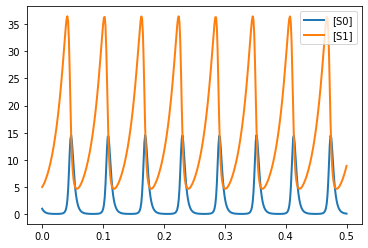

In [ ]:
# Evolved oscillator
r = te.loada ('''
var S0
var S1
ext S2
S1 -> S1+S1; k0*S1
S1 + S0 -> S0 + S0; k1*S1*S0
S0 -> ; k2*S0
k0 = 54
k1 = 22
k2 = 340
S0 = 1.0
S1 = 5.0
S2 = 9.0
''')
m = r.simulate (0, 0.5, 400)
r.plot()

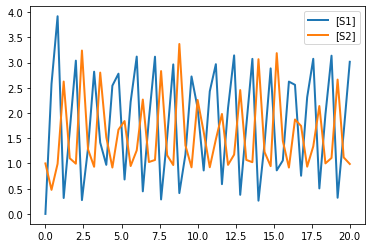

In [ ]:
model = """
// Oscillator (Heinrich model)
// From the review:
// Metabolic Regulation and Mathematical Models
// R.HEINRICH, S.M.RAPOPORT, T.A.RAPOPORT
// In Progress in Biophysics and Molecular Biology
// 1977, Vol 32, p1-82

// Reactions:
J0: $X0 -> S1; v0
J1: S1 -> ; k3*S1
J2: S1 -> S2; (k1*S1 - k_1*S2)*(1 + c*S2^q)
J3: S2 ->; k2*S2

// Species initializations
S1 = 0; S2 = 1; X0 = 1

// Variable initializations
v0 = 8; k3 = 0
k1 = 1; k_1 = 0
c = 1;  q = 3
k2 = 5;
"""
rr = te.loada(model)
rr.simulate(0, 20)
rr.plot()